# Begin of Default Credit Card Classifier with SVM from StatQuest YT

## Importing libs that we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

## Open and read the datasets

In [20]:
## Open and read the datasets form source

df = pd.read_csv('../../datasets/default-credit-card/default_of_credit_card_clients.csv', 
                 header=1)

In [21]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [22]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


## Start modifying the raw data

In [23]:
## Rename the 'default payment next month' column into 'default' column for easier usage

df.rename({'default payment next month':'DEFAULT'}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
## We don't need the 'ID' column, so we drop the 'ID' column from our dataFrame

df.drop('ID', axis=1, inplace=True) ## 0=rows ; 1=columns ; This is the alternative from using 'columns' or 'rows'
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
# Check each column dataType

df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [32]:
df['SEX'].unique() ## cuma ambil data yg unik, gasemua diprint

array([2, 1], dtype=int64)

In [33]:
df['EDUCATION'].unique() ## cuma ambil data yg unik, gasemua diprint

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [34]:
df['MARRIAGE'].unique() ## cuma ambil data yg unik, gasemua diprint

array([1, 2, 3, 0], dtype=int64)

In [38]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)]) ## cek panjang(jumlah) data yg punya value 0

68

In [39]:
len(df) ## cek panjang(jumlah) keseluruhan data mentah

30000

In [40]:
## ambil data berdasarkan label
## ini hanya ambil yg edukasi sama marriage != 0, yg 0 gadiambil, masukin ke variabel baru

df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [41]:
len(df_no_missing) ## cek panjang data yang kolom edukasi dan menikah udah difilter di atas

29932

In [43]:
df_no_missing['EDUCATION'].unique() ## cek nilai unik dari kolom edukasi (hanya tampil 1 kali)

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [44]:
df_no_missing['MARRIAGE'].unique() ## cek nilai unik dari kolom menikah (hanya tampil 1 kali)

array([1, 2, 3], dtype=int64)

## DOWNSAMPLE THE DATA

In [45]:
## check the len of the dataFrame with no missing value anymore
len(df_no_missing)

29932

In [48]:
## split the data into 2
## one with the columns default value == 0
## and another one with the columns default value == 1
df_not_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

In [50]:
## downsampling the data with resample func from pandas
## not replacing the data
## number of samples is 1000
## random state = so the randomness is set

df_not_default_downsampled = resample(df_not_default,
                                      replace=False,
                                      n_samples=1000,
                                      random_state=42)
len(df_not_default_downsampled)

1000

In [51]:
## downsampling the data with resample func from pandas
## not replacing the data
## number of samples is 1000
## random state = so the randomness is set

df_default_downsampled = resample(df_default,
                                  replace=False,
                                  n_samples=1000,
                                  random_state=42)
len(df_default_downsampled)

1000

In [52]:
## merge again the default and not default data that has been downsampled into 1000 data each
## in total now we have 2000 data! From the beginning of 29932 data

df_downsample = pd.concat([df_not_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

## Format Data Part 1
We have taken care of the missing data, so now we are ready to start formatting the data for making our Support Vector Machine (SVM)

### We need two steps.

First, split the data into two parts
1. Columns data that we need to make our classifications (X) capital
2. Columns data that we need to make our predicts (y) not-capital


In [55]:
## We now make a copy from df_downsample for our classification column (X)

X = df_downsample.drop(['DEFAULT'], axis=1).copy() ## 1 == 'columns'
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [56]:
# We now get the 'DEFAULT' column from df_downsample for our predictions (y)

y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

## Format Data Part 2
We are now have our classification columns (X) and our prediction column (y)

Now because the 'EDUCATION', 'MARRIAGE', etc. columns are categorical and not have the value that boolean (just 0 and 1), we have to tranform that categorical data into boolean! (just 0 and 1). How we do that?

One-Hot Encoding! or dummy encoding. That's the trick's name.

We transfom that categorical value in one columns into the columns itself. Ex. MARRIAGE column have 3 values [0,1,2], so the One-Hot Encoding will transform that one column with 3 values into 3 columns with 2 values, only 0 and 1 (boolean). We do this because most of the algorithms are not understand the categorical data and just understand the boolean, which means they just understand 0 and 1, so we make a multi-column to solve that!

In [60]:
## Visualisizing the One-Hot Encoder with get_dummies() from pandas
## Now we have split the 'MARRIAGE' into 3 columns with the value only 0 and 1.

X_encoded = pd.get_dummies(X, columns=['MARRIAGE'])
X_encoded.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


In [63]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                       'EDUCATION',
                                       'MARRIAGE',
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6',])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


## Format Data Part 3

We are now going into the SVM thing!
So, we are using Radial Basis Function (RBF) from the Support Vector Machine (SVM). Because the RBF of SVM assumes that our data are scaled an centered, in other words, our data should have a mean value = 0 and a standard deviation value = 1. So, we need to do this to our training dataset and testing dataset.

First thing first, we have to split our data, so wewill scale and centering the data independently to avoid ___Data Leakage___.

In [73]:
## Because we have done One-Hot Encoding before, the X variable is X_encoded
## and the predict label (y) still the same

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## SVM TIME!

Now, we have done manipulating, preparing, and formatting our data dor Support Vector Machine. So, let's do it!

In [80]:
## Train the SVC instances in cld_svm with our training dataset, with fit() function

clf_svm = SVC(kernel='rbf', random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

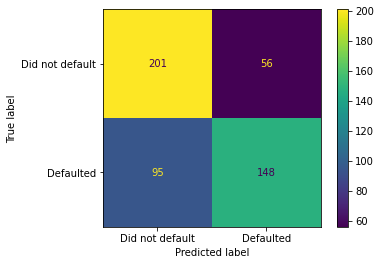

In [81]:
## Visualisizing the test data

plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=["Did not default", "Defaulted"])

## Optimizing the Parameters

So, the output of the classification is not that gewd. We have to optimize something, that is the parameters. How to do that?


Okay, ___Cross-Validation (CV)___ come to the rescue!

Optimizng the SVM is all about finding the best value for the ___gamma___, and, potentially, the ___regularization parameter, C___.

We will use ___GridSearchCV()___, because we have two params to optimize. We specify bunch of potential values for the ___gamma___ and ___C___, and ___GridSearchCV()___ will tests all possible combinations. How cool is that, huh?

In [83]:
param_grid = [
    {'C': [0.5, 1, 10, 100], # NOTE: C > 0
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf', 'linear', 'poly']},
]

optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=5, # n of folds cv
                             scoring="accuracy",
                             verbose=0) # if we want to see what GridSearch is doin, set verbose=2
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


## Playing with the real SVM now! (After we've done the optimizing part)


In [85]:
## We train again the training dataset with our new SVC.
## Now, we provide the params that we get from cross-validating the params to get the best one possible

clf_svm = SVC(random_state=42, gamma=0.001, C=100, kernel='rbf')
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

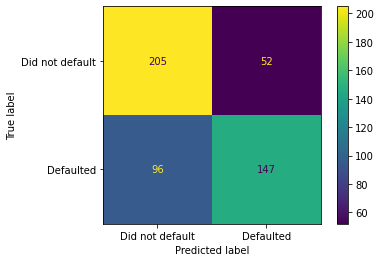

In [90]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=['Did not default', 'Defaulted'])

Since we cannot draw 24 dimensions (or infinite dimensions becase we use this beautiful rbf) so we have to collapse the data into two dimensions so we can draw the output.

We will use Principal Component Analysis (PCA) to shrink the dimensions into 2. Ehhmm, well, i have to read and find out more about PCA later on, cheers!

In [92]:
len(df_downsample.columns)

24

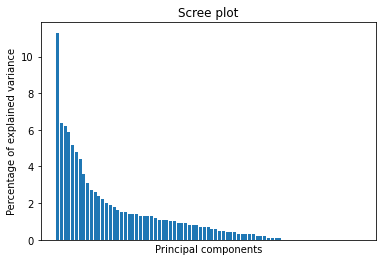

In [95]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x',
                which='both',
                bottom=False,
                top=False,
                labelbottom=False)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal components')
plt.title('Scree plot')
plt.show()


## The first 2 columns should taller than the others, that means the 2 columns can accurately reflect the original data
##But, we don't see that in our Scree plot below, so, it's kinda useless